In [2]:
import os
from collections import Counter
from tqdm import tqdm
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
import matplotlib.pyplot as plt

         Current function value: 0.152084
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   99
Model:                          Logit   Df Residuals:                       87
Method:                           MLE   Df Model:                           11
Date:                Tue, 06 Oct 2020   Pseudo R-squ.:                  0.7802
Time:                        23:10:37   Log-Likelihood:                -15.056
converged:                      False   LL-Null:                       -68.495
Covariance Type:            nonrobust   LLR p-value:                 7.686e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8573    221.658      0.004      0.997    -433.585     435.300
x2           -46.9030   4762.892     -0.010      0.992   -9382.00

D:\python\anconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\python\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


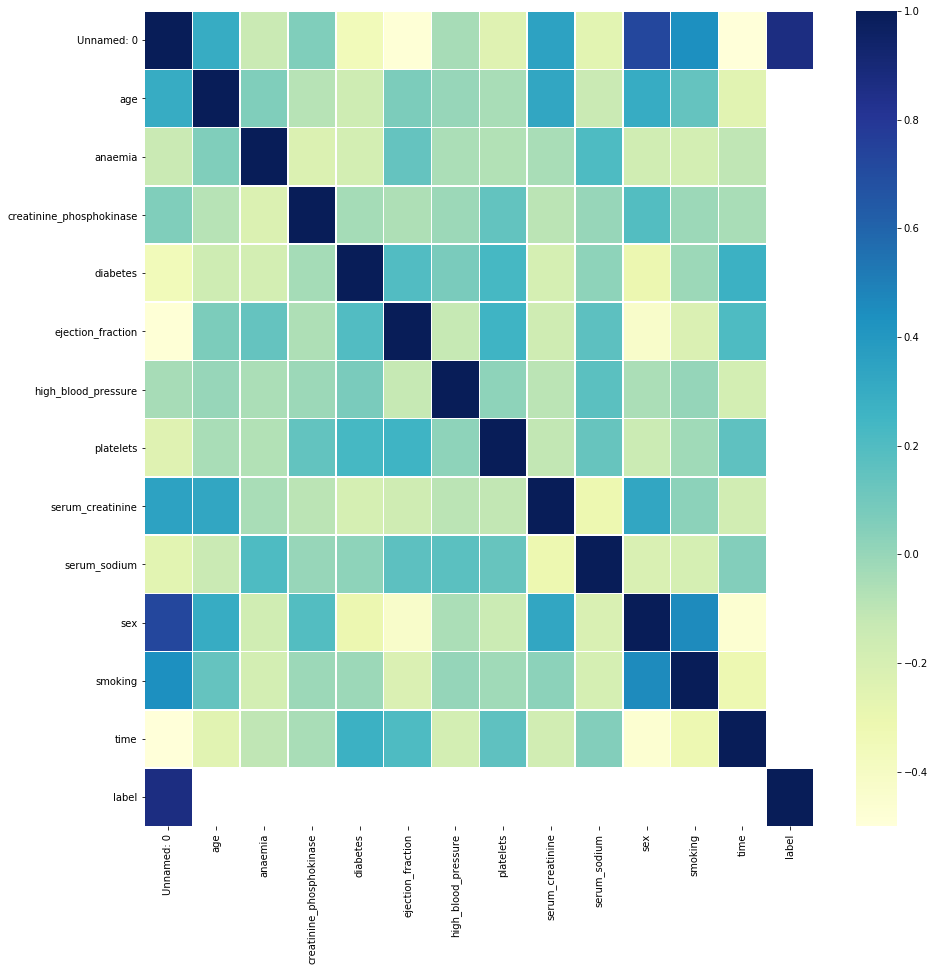

In [25]:
########################开始数据预处理################################################################
df = pd.read_csv('train_hf_data_sub.csv')
#print(df.isnull().any())
#print(np.isnan(df).any())
df_null = df.isnull()
df_null = df[df_null == True]
#print(df_null) 
#缺失值处理，以下两种方式均可
#删除包含缺失值的行
df.dropna(inplace=True)
#缺失值填充
df.fillna('10')
#print(np.isfinite(df).all())
#False:不包含
#True:包含
#print(np.isinf(df).all()) 
#数据处理
df_inf = np.isinf(df)
df[df_inf] = 0
dfl = pd.read_csv('train_hf_label_sub.csv')
#print(dfl.isnull().any())
##print(np.isnan(dfl).any())
dfl_null = dfl.isnull()
dfl_null = dfl[dfl_null == True]
#print(dfl_null) 
#缺失值处理，以下两种方式均可
#删除包含缺失值的行
dfl.dropna(inplace=True)
#缺失值填充
dfl.fillna('10')
#print(np.isfinite(dfl).all())
#False:不包含
#True:包含
#print(np.isinf(dfl).all())
 
#数据处理
dfl_inf = np.isinf(dfl)
dfl[dfl_inf] = 0
ts = pd.read_csv('test_hf_data.csv')
#print(ts.isnull().any())
#print(np.isnan(ts).any())
ts_null = ts.isnull()
ts_null = ts[ts_null == True]
#print(ts_null) 
#缺失值处理，以下两种方式均可
#删除包含缺失值的行
ts.dropna(inplace=True)
#缺失值填充
ts.fillna('10')
#print(np.isfinite(ts).all())
#False:不包含
#True:包含
#print(np.isinf(ts).all())
 
#数据处理
ts_inf = np.isinf(ts)
ts[ts_inf] = 0
tsl = pd.read_csv('test_hf_label.csv')
#print(tsl.isnull().any())
#print(np.isnan(tsl).any())
tsl_null = tsl.isnull()
tsl_null = tsl[tsl_null == True]
#print(tsl_null) 
#缺失值处理，以下两种方式均可
#删除包含缺失值的行
tsl.dropna(inplace=True)
#缺失值填充
tsl.fillna('10')
#print(np.isfinite(tsl).all())
#False:不包含
#True:包含
#print(np.isinf(tsl).all())
 
#数据处理
tsl_inf = np.isinf(tsl)
tsl[tsl_inf] = 0
############数据预处理完毕#############################################################
plt.figure(figsize=(15,15)) # 设置画布大小
t=df.append(dfl)
t1=ts.append(tsl)
corr = t.corr()
#print(corr)
sns.heatmap(corr, cmap='YlGnBu', fmt='.1f', linewidths=0.5)         ###################数据可视化####################
###########################数据分组############################
X_train,X_test,y_train,y_test = train_test_split(df,dfl,test_size=0.4,random_state=0)
X1_train,X1_test,y1_train,y1_test = train_test_split(ts,tsl,test_size=0.4,random_state=0)
#######################训练开始#############################
import statsmodels.api as sm
# 求系数回归显著性检验
model0 = sm.Logit(np.asarray(dfl)[1:,1],np.asarray(df)[1:,1:]).fit()
print(model0.summary())
#############显著性求完#########################
model = LogisticRegression()
model.fit(X_train, y_train['label'])
print("error_train=")
print(1-model.score(X_test, y_test['label']))
print("error_test")
print(1-model.score(X1_test, y1_test['label']))

In [134]:
#######################求交叉验证效果############################
def KFoldTest(data, model, foldNum):
    data_array = np.asarray(df)
    X = np.asarray(df)[:,1:] # 获取特征
    Y = np.asarray(dfl)[:,1] # 获取label
    Y  = Y.reshape(Y.shape[0])
    #print(X) # 查看各类别数据分布情况
    kf = KFold(n_splits=foldNum, shuffle=True, random_state=2)
    all_train_acc = []
    all_test_acc = []
    for train_index, test_index in tqdm(kf.split(X)):
        train_x, test_x = X[train_index], X[test_index]
        train_y, test_y = Y[train_index], Y[test_index]
        # 模型训练
        model.fit(train_x, train_y)
        # 统计训练集结果
        y_pred_train = model.predict(train_x)
        acc = accuracy_score(train_y, y_pred_train)
        all_train_acc.append(acc)
        # 统计测试集结果
        y_pred_test = model.predict(test_x)
        acc = accuracy_score(test_y, y_pred_test)
        all_test_acc.append(acc)
    train_acc = sum(all_train_acc) / foldNum
    #train_f1 = sum(all_train_f1) / foldNum
    test_acc = sum(all_test_acc) / foldNum
    print('训练集:\ncross_valid_error:{}\n'.format(1-train_acc))
    #print(myConfusionMatrix(train_confusion))
    print('\n\n')
    print('测试集:\ncross_valid_error:{}\nf'.format(1-test_acc))
    #print(myConfusionMatrix(test_confusion))




In [135]:
print("train")
KFoldTest(t, model, 10)
print("test:")
KFoldTest(t1, model, 10)

0it [00:00, ?it/s]D:\python\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\python\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

train
训练集:
cross_valid_error:0.20111111111111124




测试集:
cross_valid_error:0.2899999999999999
f
test:


D:\python\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\python\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extr

训练集:
cross_valid_error:0.20111111111111124




测试集:
cross_valid_error:0.2899999999999999
f
